In [24]:
# Data manipulation and numerical operations
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning and preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix

# Survival analysis
from lifelines import KaplanMeierFitter
from lifelines import CoxPHFitter

# Optional for advanced modeling
# import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

In [25]:
# Loading the dataset
data = pd.read_csv("Breast Cancer.csv")

In [26]:
# Displaying the first few rows of the dataset
data.head()

,Patient ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,...,Overall Survival Status,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,Sex,3-Gene classifier subtype,Tumor Size,Tumor Stage,Patient's Vital Status
0,MB-0000,75.65,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,No,claudin-low,1.0,Positve,...,Living,Negative,Yes,138.65,Not Recurred,Female,ER-/HER2-,22.0,2.0,Living
1,MB-0002,43.19,Breast Conserving,Breast Cancer,Breast Invasive Ductal Carcinoma,High,No,LumA,1.0,Positve,...,Living,Positive,Yes,83.52,Not Recurred,Female,ER+/HER2- High Prolif,10.0,1.0,Living
2,MB-0005,48.87,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,No,151.28,Recurred,Female,NaN,15.0,2.0,Died of Disease
3,MB-0006,47.68,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,Yes,LumB,1.0,Positve,...,Living,Positive,Yes,162.76,Not Recurred,Female,NaN,25.0,2.0,Living
4,MB-0008,76.97,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,Yes,18.55,Recurred,Female,ER+/HER2- High Prolif,40.0,2.0,Died of Disease


In [27]:
data.shape

(2509, 34)

In [28]:
data.isnull().sum()

Patient ID                          0
Age at Diagnosis                   11
Type of Breast Surgery            554
Cancer Type                         0
Cancer Type Detailed                0
Cellularity                       592
Chemotherapy                      529
Pam50 + Claudin-low subtype       529
Cohort                             11
ER status measured by IHC          83
ER Status                          40
Neoplasm Histologic Grade         121
HER2 status measured by SNP6      529
HER2 Status                       529
Tumor Other Histologic Subtype    135
Hormone Therapy                   529
Inferred Menopausal State         529
Integrative Cluster               529
Primary Tumor Laterality          639
Lymph nodes examined positive     266
Mutation Count                    152
Nottingham prognostic index       222
Oncotree Code                       0
Overall Survival (Months)         528
Overall Survival Status           528
PR Status                         529
Radio Therap

In [29]:
# Check percentage of missing values for each column
missing_percentage = data.isnull().mean() * 100
print(missing_percentage)

Patient ID                         0.000000
Age at Diagnosis                   0.438422
Type of Breast Surgery            22.080510
Cancer Type                        0.000000
Cancer Type Detailed               0.000000
Cellularity                       23.595058
Chemotherapy                      21.084097
Pam50 + Claudin-low subtype       21.084097
Cohort                             0.438422
ER status measured by IHC          3.308091
ER Status                          1.594261
Neoplasm Histologic Grade          4.822639
HER2 status measured by SNP6      21.084097
HER2 Status                       21.084097
Tumor Other Histologic Subtype     5.380630
Hormone Therapy                   21.084097
Inferred Menopausal State         21.084097
Integrative Cluster               21.084097
Primary Tumor Laterality          25.468314
Lymph nodes examined positive     10.601833
Mutation Count                     6.058191
Nottingham prognostic index        8.848147
Oncotree Code                   

In [30]:
# Filling numerical columns with median
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].median())

# Filling categorical columns with mode
categorical_cols = data.select_dtypes(include=['object']).columns
data[categorical_cols] = data[categorical_cols].fillna(data[categorical_cols].mode().iloc[0])

# Check the cleaned dataset
print(data.isnull().sum())

Patient ID                        0
Age at Diagnosis                  0
Type of Breast Surgery            0
Cancer Type                       0
Cancer Type Detailed              0
Cellularity                       0
Chemotherapy                      0
Pam50 + Claudin-low subtype       0
Cohort                            0
ER status measured by IHC         0
ER Status                         0
Neoplasm Histologic Grade         0
HER2 status measured by SNP6      0
HER2 Status                       0
Tumor Other Histologic Subtype    0
Hormone Therapy                   0
Inferred Menopausal State         0
Integrative Cluster               0
Primary Tumor Laterality          0
Lymph nodes examined positive     0
Mutation Count                    0
Nottingham prognostic index       0
Oncotree Code                     0
Overall Survival (Months)         0
Overall Survival Status           0
PR Status                         0
Radio Therapy                     0
Relapse Free Status (Months)

In [31]:
# Checking the columns data types

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2509 entries, 0 to 2508
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Patient ID                      2509 non-null   object 
 1   Age at Diagnosis                2509 non-null   float64
 2   Type of Breast Surgery          2509 non-null   object 
 3   Cancer Type                     2509 non-null   object 
 4   Cancer Type Detailed            2509 non-null   object 
 5   Cellularity                     2509 non-null   object 
 6   Chemotherapy                    2509 non-null   object 
 7   Pam50 + Claudin-low subtype     2509 non-null   object 
 8   Cohort                          2509 non-null   float64
 9   ER status measured by IHC       2509 non-null   object 
 10  ER Status                       2509 non-null   object 
 11  Neoplasm Histologic Grade       2509 non-null   float64
 12  HER2 status measured by SNP6    25

In [33]:
# List of columns to one-hot encode (all the object type columns)
categorical_columns = ['Type of Breast Surgery', 'Cancer Type', 'Cancer Type Detailed', 
                       'Cellularity', 'Chemotherapy', 'Pam50 + Claudin-low subtype', 'Cohort', 
                       'ER status measured by IHC', 'ER Status', 'HER2 status measured by SNP6', 
                       'HER2 Status', 'Tumor Other Histologic Subtype', 'Hormone Therapy', 
                       'Inferred Menopausal State', 'Integrative Cluster', 'Primary Tumor Laterality', 
                       'Overall Survival Status', 'PR Status', 'Radio Therapy', 
                       'Relapse Free Status', 'Sex', '3-Gene classifier subtype', 
                       'Patient\'s Vital Status']

# Apply pd.get_dummies() to one-hot encode these columns
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# The 'drop_first=True' argument drops the first level of each category to avoid multicollinearity

In [34]:
data.head()

,Patient ID,Age at Diagnosis,Neoplasm Histologic Grade,Lymph nodes examined positive,Mutation Count,Nottingham prognostic index,Oncotree Code,Overall Survival (Months),Relapse Free Status (Months),Tumor Size,...,Primary Tumor Laterality_Right,Overall Survival Status_Living,PR Status_Positive,Radio Therapy_Yes,Relapse Free Status_Recurred,3-Gene classifier subtype_ER+/HER2- Low Prolif,3-Gene classifier subtype_ER-/HER2-,3-Gene classifier subtype_HER2+,Patient's Vital Status_Died of Other Causes,Patient's Vital Status_Living
0,MB-0000,75.65,3.0,10.0,5.0,6.044,IDC,140.500000,138.65,22.0,...,True,True,False,True,False,False,True,False,False,True
1,MB-0002,43.19,3.0,0.0,2.0,4.020,IDC,84.633333,83.52,10.0,...,True,True,True,True,False,False,False,False,False,True
2,MB-0005,48.87,2.0,1.0,2.0,4.030,IDC,163.700000,151.28,15.0,...,True,False,True,False,True,True,False,False,False,False
3,MB-0006,47.68,2.0,3.0,1.0,4.050,MDLC,164.933333,162.76,25.0,...,True,True,True,True,False,True,False,False,False,True
4,MB-0008,76.97,3.0,8.0,2.0,6.080,MDLC,41.366667,18.55,40.0,...,True,False,True,True,True,False,False,False,False,False


In [35]:
# Initialize the LabelEncoder
le = LabelEncoder()

# List of boolean columns (True/False values)
boolean_columns = ["Patient's Vital Status_Died of Other Causes","Patient's Vital Status_Living"]

# Apply LabelEncoder to each boolean column
for col in boolean_columns:
    data[col] = le.fit_transform(data[col])

# After encoding, True will be 1, False will be 0

In [36]:
data.head()

,Patient ID,Age at Diagnosis,Neoplasm Histologic Grade,Lymph nodes examined positive,Mutation Count,Nottingham prognostic index,Oncotree Code,Overall Survival (Months),Relapse Free Status (Months),Tumor Size,...,Primary Tumor Laterality_Right,Overall Survival Status_Living,PR Status_Positive,Radio Therapy_Yes,Relapse Free Status_Recurred,3-Gene classifier subtype_ER+/HER2- Low Prolif,3-Gene classifier subtype_ER-/HER2-,3-Gene classifier subtype_HER2+,Patient's Vital Status_Died of Other Causes,Patient's Vital Status_Living
0,MB-0000,75.65,3.0,10.0,5.0,6.044,IDC,140.500000,138.65,22.0,...,True,True,False,True,False,False,True,False,0,1
1,MB-0002,43.19,3.0,0.0,2.0,4.020,IDC,84.633333,83.52,10.0,...,True,True,True,True,False,False,False,False,0,1
2,MB-0005,48.87,2.0,1.0,2.0,4.030,IDC,163.700000,151.28,15.0,...,True,False,True,False,True,True,False,False,0,0
3,MB-0006,47.68,2.0,3.0,1.0,4.050,MDLC,164.933333,162.76,25.0,...,True,True,True,True,False,True,False,False,0,1
4,MB-0008,76.97,3.0,8.0,2.0,6.080,MDLC,41.366667,18.55,40.0,...,True,False,True,True,True,False,False,False,0,0


In [37]:
# Set plot style for better visualization
sns.set(style="whitegrid")

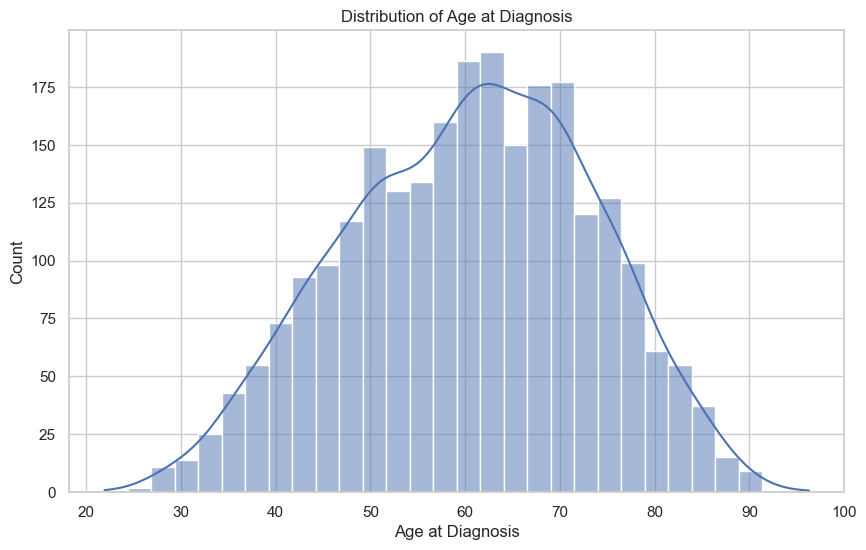

In [38]:
# 1. Distribution of Numerical Features
# Age at Diagnosis
plt.figure(figsize=(10,6))
sns.histplot(data['Age at Diagnosis'], kde=True, bins=30)
plt.title('Distribution of Age at Diagnosis')
plt.show()

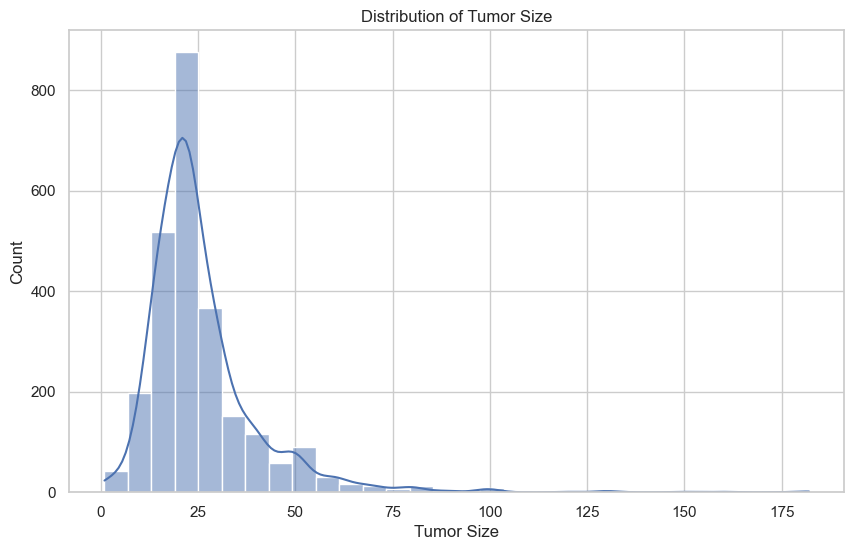

In [39]:
# Tumor Size Distribution
plt.figure(figsize=(10,6))
sns.histplot(data['Tumor Size'], kde=True, bins=30)
plt.title('Distribution of Tumor Size')
plt.show()

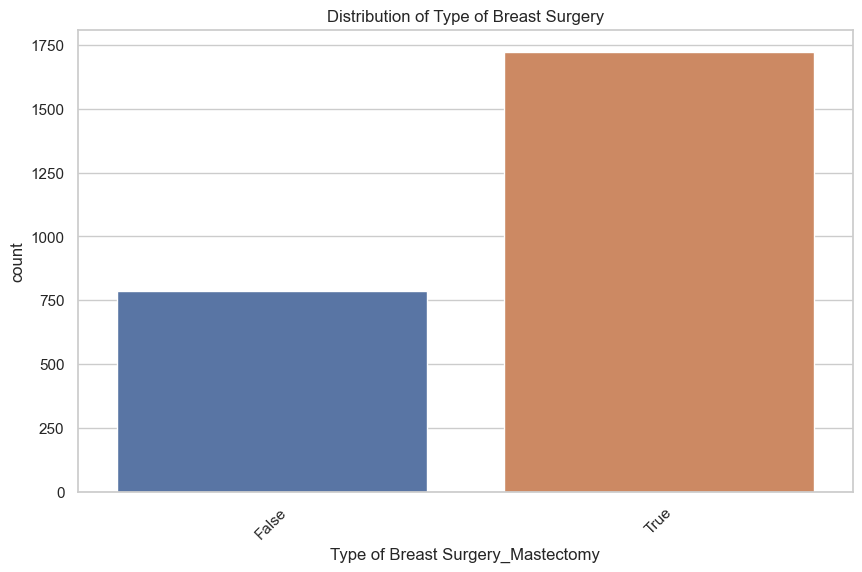

In [40]:
# 2. Distribution of Categorical Features
# Type of Breast Surgery
plt.figure(figsize=(10,6))
sns.countplot(x='Type of Breast Surgery_Mastectomy', data=data)
plt.title('Distribution of Type of Breast Surgery')
plt.xticks(rotation=45)
plt.show()

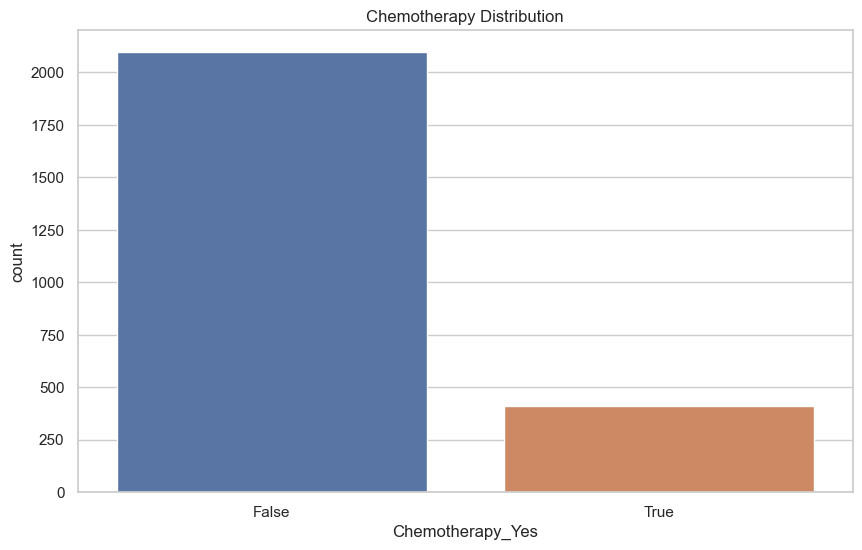

In [41]:
# Chemotherapy
plt.figure(figsize=(10,6))
sns.countplot(x='Chemotherapy_Yes', data=data)
plt.title('Chemotherapy Distribution')
plt.show()

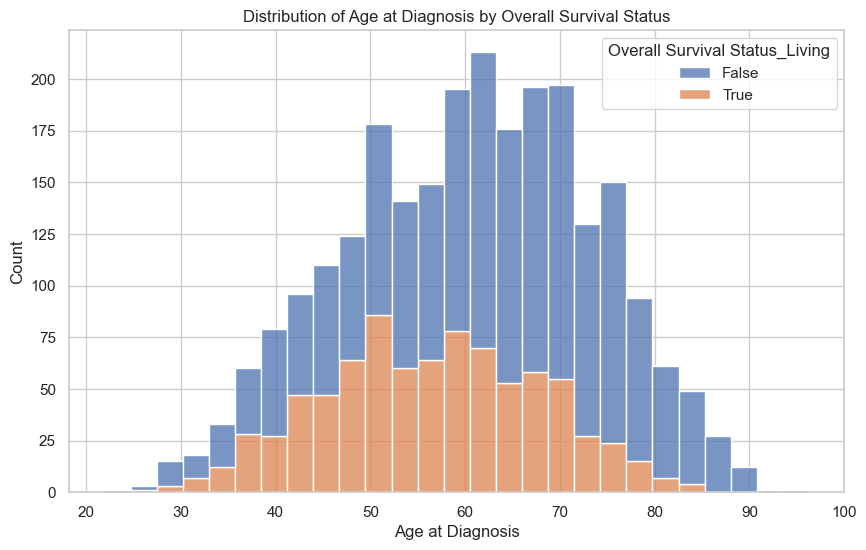

In [42]:
# Example: Visualizing the distribution of 'Age at Diagnosis' by 'Overall Survival Status'
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Age at Diagnosis', hue='Overall Survival Status_Living', multiple='stack')
plt.title("Distribution of Age at Diagnosis by Overall Survival Status")
plt.show()

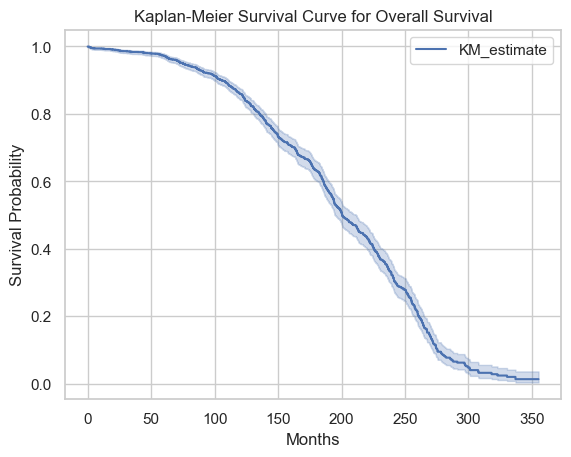

In [43]:
from lifelines import KaplanMeierFitter

# Example: Kaplan-Meier curve for overall survival
kmf = KaplanMeierFitter()

# Fit the data (e.g., Overall Survival Status and time column like 'Overall Survival (Months)')
T = data['Overall Survival (Months)']  # Duration
E = data['Overall Survival Status_Living']    # Event observed (1=event, 0=censored)

kmf.fit(T, event_observed=E)
kmf.plot_survival_function()
plt.title("Kaplan-Meier Survival Curve for Overall Survival")
plt.xlabel("Months")
plt.ylabel("Survival Probability")
plt.show()


<lifelines.CoxPHFitter: fitted with 2509 total observations, 1672 right-censored observations>
             duration col = 'Overall Survival (Months)'
                event col = 'Overall Survival Status_Living'
      baseline estimation = breslow
   number of observations = 2509
number of events observed = 837
   partial log-likelihood = -5281.86
         time fit was run = 2024-10-22 14:29:15 UTC

---
                   coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                
Age at Diagnosis  -0.01       0.99       0.00            -0.01            -0.00                 0.99                 1.00
Tumor Size         0.00       1.00       0.00            -0.01             0.01                 0.99                 1.01

                   cmp to     z      p   -log2(p)
covariate                                        
Age at Diagnosis     0.00 -3.07 <0.005       8.89
Tumor Size           0.00  0.09   0.93       0.10
---
Concordance = 0.53
Partial AIC = 10567.72
log-likelihood ratio test = 9.40 on 2 df
-log2(p) of ll-ratio test = 6.78

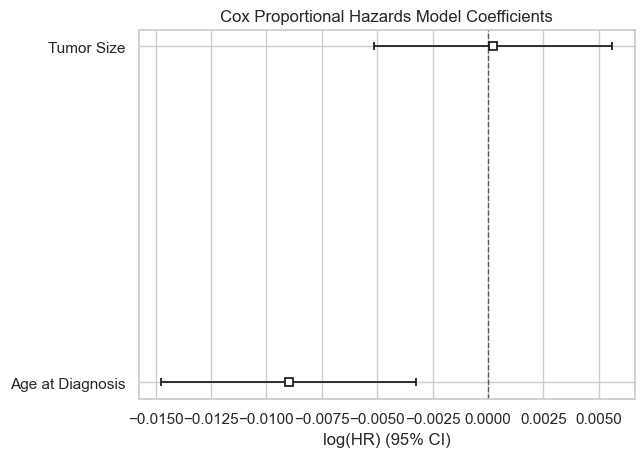

In [44]:
from lifelines import CoxPHFitter

# Prepare the dataset (ensure it's clean and scaled)
# Example features: Age at Diagnosis, Tumor Size, etc.
features = ['Age at Diagnosis', 'Tumor Size']  # Adjust for your dataset
data = data[features + ['Overall Survival (Months)', 'Overall Survival Status_Living']].dropna()

# Cox Proportional Hazards model
cph = CoxPHFitter()
cph.fit(data, duration_col='Overall Survival (Months)', event_col='Overall Survival Status_Living')

# Display the summary of the Cox model
cph.print_summary()

# Plot the Cox model coefficients
cph.plot()
plt.title("Cox Proportional Hazards Model Coefficients")
plt.show()


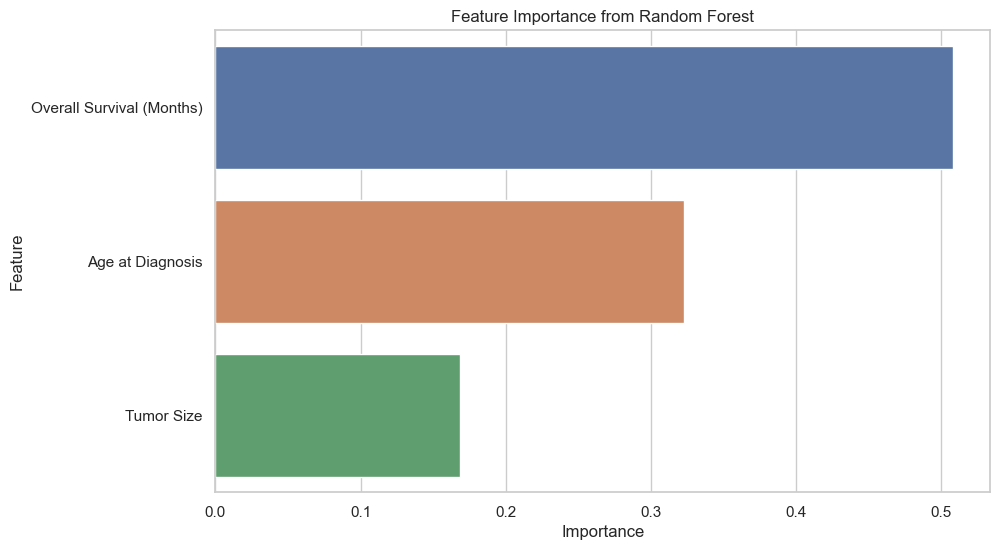

In [45]:
from sklearn.ensemble import RandomForestClassifier

# Prepare data (features and target)
X = data.drop(columns=['Overall Survival Status_Living'])  # Adjust for your dataset
y = data['Overall Survival Status_Living']

# Train a RandomForest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame for visualization
feat_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feat_importances = feat_importances.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_importances)
plt.title("Feature Importance from Random Forest")
plt.show()


In [57]:
# Selecting relevant features for model
X = data.drop(columns=["Patient\'s Vital Status_Living", "Overall Survival Status_Living"])
y = data["Patient's Vital Status_Living"]

KeyError: '["Patient\'s Vital Status_Living"] not found in axis'